In [1]:
import datetime

In [2]:
import nltk
import string

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [5]:
from collections import Counter

In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [7]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [8]:
#funtion to cut off extra intro paragraphs from beautiful soup scrape

# def trim_fat(string):
#     return string[35:-115]

In [9]:
# function to vectorize the type_of_material series into a y target vector.
def vectorize_type(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [ ]:
%%time
print(datetime.datetime.now())
print(f'vectorizer = {vectorizer}')
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
(tn, fp, fn, tp)
metrics_(tn, fp, fn, tp)
print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp})')
print(f'num_features = {rf_clf.n_features_}')
#print(rf_clf.n_classes_)
#print(rf_clf.n_outputs_)
feat_names = vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_
print(type(feature_import))
feature_import.shape
print(f'vectorizer = {vectorizer}')
# what are the actual parametrs set in the function. something specific about the random forest i forgot

In [10]:
#rate of correct predictions out of total predictions
def metrics_(tn, fp, fn, tp):
    print(datetime.datetime.now())
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'accuracy = {accuracy}')
    recall = (tp) / (tp + fn)
    print(f'recall = {recall}')
    precision = (tp) / (tp + fp)
    print(f'precision = {precision}')

In [11]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    my_lil_punc_string = '!"#$$%&\()*+,-./:;<=>@[\\]^_`{|}~'
    extras = '[\',.“-”’!—:()?@]$;"–/#|&‘°\\…%<‐+¡«»_•*>›=€·■♦£💃🏽∙≠{}¿😂¥̇̃★§🇺🇸©！💣。^‑🔥😡″̀🚨⃣😤🌫`●🤭✓📖📹✋👀¢💔😞‒📲📺🎙￼😎↓❤️😘🎉🥂🦔🥩🐐🍑🤸🕳🌵⛽⚕🔊™†‾′̈״÷💜💛¨´💥☄́~‚⌚↑🏁🇰🇪🌎→🗣─‼◇😾🤷🏻♂✔💪®♪😱👍،¯⌘🌈🤩✨̊🤣−😉♥👏💩🤐💋🧓👮👴♀🥴🐎⚡🤔🙁×💯🚂🙏🏾่াং়ে্িু🍆💦🎥💌◾📱👋🏼؟🙂🚫❗🙄🛑🌧❄̶🤝；🤯🧵😹¶➡😏🔧✌➼◉🐱⚪̧̄➔😺😁🇬🇧👎🍺'
    punc_list = my_lil_punc_string + extras
    
    for char in string:
        if char in punc_list:  
            string = string.replace(char, "")
            
    return string

In [12]:
%%time
_2019 = pd.read_csv('data/p_section_notna2019.csv', index_col='Unnamed: 0')

CPU times: user 2.19 s, sys: 321 ms, total: 2.51 s
Wall time: 2.52 s


In [13]:
%%time
_2019_df = _2019.copy()

CPU times: user 6.04 ms, sys: 1.76 ms, total: 7.8 ms
Wall time: 7.45 ms


In [14]:
#define X. X is currently pandas series of unsplit strings

X = _2019_df.text

# manual punctuation work

In [15]:
# #function that removes string.punctuation w/out the '?'
# def punc_strip(string):
#     my_lil_punc_string = '!"#$%&\()*+,-./:;<=>@[\\]^_`{|}~'
#     extras = '[\',.“-”’!—:()?@]$;"–/#|&‘°\\…%<‐+¡«»_•*>›=€·■♦£💃🏽∙≠{}¿😂¥̇̃★§🇺🇸©！💣。^‑🔥😡″̀🚨⃣😤🌫`●🤭✓📖📹✋👀¢💔😞‒📲📺🎙￼😎↓❤️😘🎉🥂🦔🥩🐐🍑🤸🕳🌵⛽⚕🔊™†‾′̈״÷💜💛¨´💥☄́~‚⌚↑🏁🇰🇪🌎→🗣─‼◇😾🤷🏻♂✔💪®♪😱👍،¯⌘🌈🤩✨̊🤣−😉♥👏💩🤐💋🧓👮👴♀🥴🐎⚡🤔🙁×💯🚂🙏🏾่াং়ে্িু🍆💦🎥💌◾📱👋🏼؟🙂🚫❗🙄🛑🌧❄̶🤝；🤯🧵😹¶➡😏🔧✌➼◉🐱⚪̧̄➔😺😁🇬🇧👎🍺'
#     punc_list = my_lil_punc + extras
    
#     for char in string:
#         if char in punc_list:  
#             string = string.replace(char, "")
            
#     return string

In [16]:
%%time
X = X.apply(punc_strip)

CPU times: user 36.3 s, sys: 291 ms, total: 36.6 s
Wall time: 36.9 s


In [17]:
#X[0]

In [19]:
# define y as a series of op-ed or news

y = _2019_df.type_of_material

In [20]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y = vectorize_type(y)

CPU times: user 8.07 ms, sys: 944 µs, total: 9.01 ms
Wall time: 8.44 ms


In [21]:
type(X)

pandas.core.series.Series

In [22]:
#turn series into list...

corpus = list(X)

In [23]:
corpus[0]

'Advertisement Supported by Imagine what we could do with our money and hours if we set our phones aside for a year By Paul Greenberg Mr Greenberg is a fellow at the Safina Center More than threequarters of all Americans own a smartphone In 2018 those 253 million Americans spent 1380 and 1460 hours on their smartphone and other mobile devices Thats 91 waking days cumulatively that adds up to 370 billion waking American hours and 349 billion In 2019 heres what we could do instead In most Western states that 1380 you spent on your phone could buy half an acre of land In the right conditions that half acre could easily accommodate 150 trees A single tree sequesters 48 pounds of carbon a year It takes about 30 minutes for an amateur forester to plant a tree If every American smartphone owner used that time and money to plant half an acre of trees we would sequester about 886 million tons of carbon a year enough to offset more than 10 percent of the countrys annual emissions If you dont wan

# sklearn TfidfVectorizer(stop_words='english', strip_accents='ascii')

In [24]:
# %%time
# #create vectorizer

# vectorizer = TfidfVectorizer(#input='content', 
# #                 encoding='utf-8', 
# #                 decode_error='strict', 
#                  strip_accents=None, 
#                  lowercase=True, 
# #                 preprocessor=None, 
# #                 tokenizer=None, 
# #                 analyzer='word', 
#                  stop_words='english', 
# #                 token_pattern='(?u)\b\w\w+\b', 
# #                 ngram_range=(1, 1), 
# #                 max_df=1.0, 
# #                 min_df=1, 
#                  max_features=None, 
# #                 vocabulary=None, 
# #                 binary=False, 
# #                 dtype=<class 'numpy.float64'>, 
# #                 norm='l2', 
# #                 use_idf=True, 
# #                 smooth_idf=True, 
# #                 sublinear_tf=False
# )
# X = vectorizer.fit_transform(corpus)

In [25]:
# %%time
# feature_names = vectorizer.get_feature_names()

In [26]:
# %%time
# stop_words = vectorizer.get_stop_words()

In [27]:
# feature_names;

In [28]:
# len(feature_names)

In [29]:
# len(stop_words)

# resample class size w/ imbalanced learn

In [30]:
# y.shape

In [31]:
# X.shape

In [32]:
# %%time
# #balance the classes

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)

In [33]:
# %%time
# #X, y --> X_resampled, y_resampled
# X_resampled, y_resampled = rus.fit_resample(X, y)


# #return a list of tuples for item, and count of item. in this case 4139 each
# print(sorted(Counter(y_resampled).items()))

In [34]:
# y_resampled.shape

In [35]:
# X_resampled.shape

In [36]:
# %%time
# #test, train, split

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

# Multinomial Naive Bayes/imbalanced learn/TFIDF vectorizer

In [37]:
# %%time

# multinm_clf = MultinomialNB()
# multinm_clf.fit(X_train, y_train)

In [38]:
#multinm_clf.class_count_

In [39]:
#y_pred = multinm_clf.predict(X_test)

In [40]:
# #clf.score = accuracy = 'true'(pos/neg) / total

# multinm_clf.score(X_test, y_test)

In [41]:
#confusion_matrix(y_true = y_test, y_pred = y_pred)

In [42]:
# tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
# (tn, fp, fn, tp)

In [43]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# accuracy

In [44]:
# # rate of actual op-ed articles, out of all the actual od-ed articles

# recall = (tp) / (tp + fn)
# recall

In [45]:
# # rate of correct predictions of op-ed articles out of all predictions

# precision = (tp) / (tp + fp)
# precision

In [46]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# print(f'accuracy = {accuracy}')
# recall = (tp) / (tp + fn)
# print(f'recall = {recall}')
# precision = (tp) / (tp + fp)
# print(f'precision = {precision}')

# random forest classifier

In [47]:
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, 
#                                               *, 
#                                               criterion='gini', 
#                                               max_depth=None, 
#                                               min_samples_split=2, 
#                                               min_samples_leaf=1, 
#                                               min_weight_fraction_leaf=0.0, 
#                                               max_features='auto', 
#                                               max_leaf_nodes=None, 
#                                               min_impurity_decrease=0.0, 
#                                               min_impurity_split=None, 
#                                               bootstrap=True, 
#                                               oob_score=False, 
#                                               n_jobs=None, 
#                                               random_state=None, 
#                                               verbose=0, 
#                                               warm_start=False, 
#                                               class_weight=None, 
#                                               ccp_alpha=0.0, 
#                                               max_samples=None)

In [48]:
# %%time

# rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [49]:
# %%time

# rf_clf.fit(X_train, y_train)

In [50]:
# y_pred = rf_clf.predict(X_test)

In [51]:
# #clf.score = accuracy = 'true'(pos/neg) / total

# rf_clf.score(X_test, y_test)

In [52]:
# confusion_matrix(y_true = y_test, y_pred = y_pred)

In [53]:
# tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
# (tn, fp, fn, tp)

In [54]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# accuracy

In [55]:
# # rate of actual op-ed articles, out of all the actual od-ed articles

# recall = (tp) / (tp + fn)
# recall

In [56]:
# # rate of correct predictions of op-ed articles out of all predictions

# precision = (tp) / (tp + fp)
# precision

In [57]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# print(f'accuracy = {accuracy}')
# recall = (tp) / (tp + fn)
# print(f'recall = {recall}')
# precision = (tp) / (tp + fp)
# print(f'precision = {precision}')

In [58]:
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, 
#                                               *, 
#                                               criterion='gini', 
#                                               max_depth=None, 
#                                               min_samples_split=2, 
#                                               min_samples_leaf=1, 
#                                               min_weight_fraction_leaf=0.0, 
#                                               max_features='auto', 
#                                               max_leaf_nodes=None, 
#                                               min_impurity_decrease=0.0, 
#                                               min_impurity_split=None, 
#                                               bootstrap=True, 
#                                               oob_score=False, 
#                                               n_jobs=None, 
#                                               random_state=None, 
#                                               verbose=0, 
#                                               warm_start=False, 
#                                               class_weight=None, 
#                                               ccp_alpha=0.0, 
#                                               max_samples=None)

# NLTK 

In [59]:
nltk_2019_df = _2019.copy()

In [60]:
#define X. X is currently pandas series of unsplit strings

X_nltk = nltk_2019_df.text

In [61]:
# define y as a series of op-ed or news

y_nktk = nltk_2019_df.type_of_material

In [62]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y_nltk = vectorize_type(y_nktk)

CPU times: user 10.5 ms, sys: 1.74 ms, total: 12.2 ms
Wall time: 10.9 ms


In [63]:
#turn series into list...

corpus_nltk = list(X_nltk)

### tokenize w/ nltk

In [64]:
# %%time
# from nltk.tokenize import RegexpTokenizer
# regex_tokenizer = nltk.RegexpTokenizer(r"\w+")
# tokenized_punc = [regex_tokenizer.tokenize(article.lower())for article in corpus_nltk]

In [65]:
# (len(tokenized_punc[0])) #2218

In [66]:
# len(tokenized_punc)

In [67]:
# from nltk.tokenize import word_tokenize

In [68]:
# type(word_tokenize)

In [69]:
# %%time
# tokenized = [word_tokenize(article.lower()) for article in corpus_nltk]

# CPU times: user 4min 46s, sys: 2.39 s, total: 4min 48s
# Wall time: 4min 50s

In [70]:
# #list of list of strings. one list of strings per documents. list are various lengths around 1000

# len(tokenized[0]) #2596

## take out stop work via ntlk. does this work against sklearn when i vectorize

In [71]:
# %%time
# stop = set(stopwords.words('english'))
# tokenized_docs = [[word for word in words if word not in stop]
#             for words in tokenized_punc]

In [72]:
# #hopefully this reduced the number of strings / list

# len(tokenized[1])

In [73]:
# #docs is new tokenized, but with stop words removed

# len(tokenized_docs)

# stemming/lemmatization

In [74]:
# from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem.wordnet import WordNetLemmatizer

In [75]:
# porter = PorterStemmer()
snowball = SnowballStemmer('english')
# wordnet = WordNetLemmatizer()

In [76]:
# %%time
# docs_porter = [[porter.stem(word) for word in words]
#                    for words in docs]
# docs_snowball = [[snowball.stem(word) for word in words]
#                      for words in docs]
# docs_wordnet = [[wordnet.lemmatize(word) for word in words]
#                     for words in docs]

# CPU times: user 14min 59s, sys: 18.4 s, total: 15min 18s
# Wall time: 15min 26s

In [77]:
# %%time
# docs_porter = [[porter.stem(word) for word in words]
#                    for words in docs]

# CPU times: user 7min 16s, sys: 5.21 s, total: 7min 21s
# Wall time: 7min 22s

In [78]:
# %%time
# snowball_stemm = [[snowball.stem(word) for word in words]
#                      for words in tokenized_docs]

# # CPU times: user 5min 5s, sys: 5.98 s, total: 5min 11s
# # Wall time: 5min 13s

In [79]:
# %%time
# docs_wordnet = [[wordnet.lemmatize(word) for word in words]
#                     for words in docs]

# CPU times: user 1min 24s, sys: 4.5 s, total: 1min 28s
# Wall time: 1min 30s

In [80]:
# %%time
# ## Print the stemmed and lemmatized words from the first document
# print("%16s %16s %16s %16s" % ("word", "porter", "snowball", "lemmatizer"))
# for i in range(min(len(docs_porter[0]), len(docs_snowball[0]), len(docs_wordnet[0]))):
#     p, s, w = docs_porter[0][i], docs_snowball[0][i], docs_wordnet[0][i]
#     if len(set((p, s, w))) != 1:
#         print("%16s %16s %16s %16s" % (docs[0][i], p, s, w))
#         print(docs[0][i], w)


In [81]:
#docs and lemmatizer are the same?

# I choose SNOWBALL!!!! to sklearn

In [82]:
(corpus_nltk[0])

'[\'Advertisement\', \'Supported by\', \'Imagine what we could do with our money, and hours, if we set our phones aside for a year.\', \'By Paul Greenberg\', \'Mr. Greenberg is a fellow at the Safina Center.\', \'More than three-quarters of all Americans own a smartphone. In 2018 those 253 million Americans spent $1,380 and 1,460 hours on their smartphone and other mobile devices. That’s 91 waking days; cumulatively, that adds up to 370 billion waking American hours and $349 billion.\', \'In 2019, here’s what we could do instead.\', "In most Western states, that $1,380 you spent on your phone could buy half an acre of land. In the right conditions, that half acre could easily accommodate 150 trees. A single tree sequesters 48 pounds of carbon a year. It takes about 30 minutes for an amateur forester to plant a tree. If every American smartphone owner used that time and money to plant half an acre of trees, we would sequester about 886 million tons of carbon a year, enough to offset mor

In [83]:
len(corpus_nltk[0])

6261

In [84]:
# snowball = SnowballStemmer('english')
# snowball_tokenized = [snowball.stem(word) for word in word_tokenize(doc.lower())]

In [85]:
%%time
def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


In [86]:
test_token = snowball_tokenize(corpus_nltk[0])

In [87]:
#2596
len(test_token)

1235

In [88]:
type(corpus_nltk)

list

In [89]:
%%time
#create vectorizer

vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
                 strip_accents=None, 
                 lowercase=True, 
#                 preprocessor=None, 
                 tokenizer=snowball_tokenize, 
#                 analyzer='word', 
                 stop_words=None, 
#                 token_pattern='(?u)\b\w\w+\b', 
#                 ngram_range=(1, 1), 
                 max_df=0.85, 
                 min_df=0.15, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 38 µs, sys: 1e+03 ns, total: 39 µs
Wall time: 39.8 µs


In [90]:
%%time
print(datetime.datetime.now())

X_snowball = vectorizer.fit_transform(corpus_nltk)

2020-12-04 00:27:59.387722
CPU times: user 10min, sys: 3.47 s, total: 10min 4s
Wall time: 10min 8s


In [91]:
vectorizer

TfidfVectorizer(max_df=0.85, min_df=0.15,
                tokenizer=<function snowball_tokenize at 0x7f986bb795f0>)

In [92]:
#class sklearn.feature_extraction.text.CountVectorizer(*, 
#                                                       input='content', 
#                                                       encoding='utf-8', 
#                                                       decode_error='strict', 
#                                                       strip_accents=None, 
#                                                       lowercase=True, 
#                                                       preprocessor=None, 
#                                                       tokenizer=None, 
#                                                       stop_words=None, 
#                                                       token_pattern='(?u)\b\w\w+\b', 
#                                                       ngram_range=(1, 1), 
#                                                       analyzer='word', 
#                                                       max_df=1.0, 
#                                                       min_df=1, 
#                                                       max_features=None, 
#                                                       vocabulary=None, 
#                                                       binary=False, 
#                                                       dtype=<class 'numpy.int64'>
#)

In [93]:
count_vectorizer = CountVectorizer(strip_accents='None',
                                   lowercase=True,
                                   tokenizer=snowball_tokenize,
                                   stop_words='english',
                                   max_features=None)

# balance classes

In [94]:
# %%time
# #balance the classes

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)

In [95]:
# %%time
# #X, y --> X_resampled, y_resampled
# X_resampled, y_resampled = rus.fit_resample(X_snowball, y_nltk)
# print(sorted(Counter(y_resampled).items()))

In [96]:
# %%time
# #test, train, split

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

In [97]:
# %%time

# rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [98]:
# %%time

# rf_clf.fit(X_train, y_train)

In [99]:
#y_pred = rf_clf.predict(X_test)

In [100]:
# #clf.score = accuracy = 'true'(pos/neg) / total

# rf_clf.score(X_test, y_test)

In [101]:
# tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
# (tn, fp, fn, tp)
# metrics_(tn, fp, fn, tp)
# print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp})')
# print(rf_clf.n_features_)
# print(rf_clf.n_classes_)
# print(rf_clf.n_outputs_)
# # what are the actual parametrs set in the function. something specific about the random forest i forgot

In [102]:
nltk_features = vectorizer.get_feature_names()

In [103]:
nltk_stop = vectorizer.get_stop_words()

In [104]:
type(nltk_features)

list

In [105]:
# len(nltk_stop)

In [106]:
X_snowball.shape

(30256, 607)

In [107]:
#feature_import = rf_clf.feature_importances_

In [108]:
# property feature_importances_
# The impurity-based feature importances.

# The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

# Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.

# Returns
# feature_importances_ndarray of shape (n_features,)
# The values of this array sum to 1, unless all trees are single node trees consisting of only the root node, in which case it will be an array of zeros.



In [109]:
# feat_scores = pd.Series(feature_import,
#                            index=nltk_features)
# feat_scores = feat_scores.sort_values()
# ax = feat_scores.plot(kind='barh', figsize=(10,20))
# ax.set_title('"Decrease in Impurity" Importance')
# ax.set_xlabel('Average contribution to the reduction in variance');

In [110]:
# r = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state=0)
# for index in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feature_names[i]:<8}"
#               f"{r.importances_mean[i]:.3f}"
#               f" +/- {r.importances_std[i]:.3f}")

In [111]:
# %%time
# test_x = test_vectorizer.fit_transform(corpus_nltk)

In [112]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_snowball, y_nltk)
print(sorted(Counter(y_resampled).items()))
print(rus)

[(0, 2043), (1, 2043)]
RandomUnderSampler(random_state=0)
CPU times: user 10.4 ms, sys: 3.26 ms, total: 13.6 ms
Wall time: 12.6 ms


In [113]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

CPU times: user 4.36 ms, sys: 2.89 ms, total: 7.25 ms
Wall time: 6.11 ms


In [114]:
%%time
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

CPU times: user 448 ms, sys: 7.73 ms, total: 455 ms
Wall time: 456 ms


In [115]:
%%time
print(datetime.datetime.now())
print(f'vectorizer = {vectorizer}')
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
(tn, fp, fn, tp)
metrics_(tn, fp, fn, tp)
print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp})')
print(f'num_features = {rf_clf.n_features_}')
#print(rf_clf.n_classes_)
#print(rf_clf.n_outputs_)
feat_names = vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_
print(type(feature_import))
feature_import.shape
print(f'vectorizer = {vectorizer}')
# what are the actual parametrs set in the function. something specific about the random forest i forgot

2020-12-04 00:38:08.480030
vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.15,
                tokenizer=<function snowball_tokenize at 0x7f986bb795f0>)
accuracy = 0.9422700587084148
recall = 0.8955512572533849
precision = 0.9893162393162394
tn=500, fp=5, fn=54, tp=463)
num_features = 607
<class 'numpy.ndarray'>
vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.15,
                tokenizer=<function snowball_tokenize at 0x7f986bb795f0>)
CPU times: user 13.1 ms, sys: 3.5 ms, total: 16.6 ms
Wall time: 14.2 ms


In [116]:
feat_names = vectorizer.get_feature_names()

In [117]:
type(feature_import)

numpy.ndarray

In [118]:
X_test.shape

(1022, 607)

In [119]:
y_test.shape

(1022,)

2020-12-04 00:38:08.514854
CPU times: user 192 ms, sys: 32 ms, total: 224 ms
Wall time: 294 ms


Text(0.5, 0, 'Average contribution to the reduction in variance')

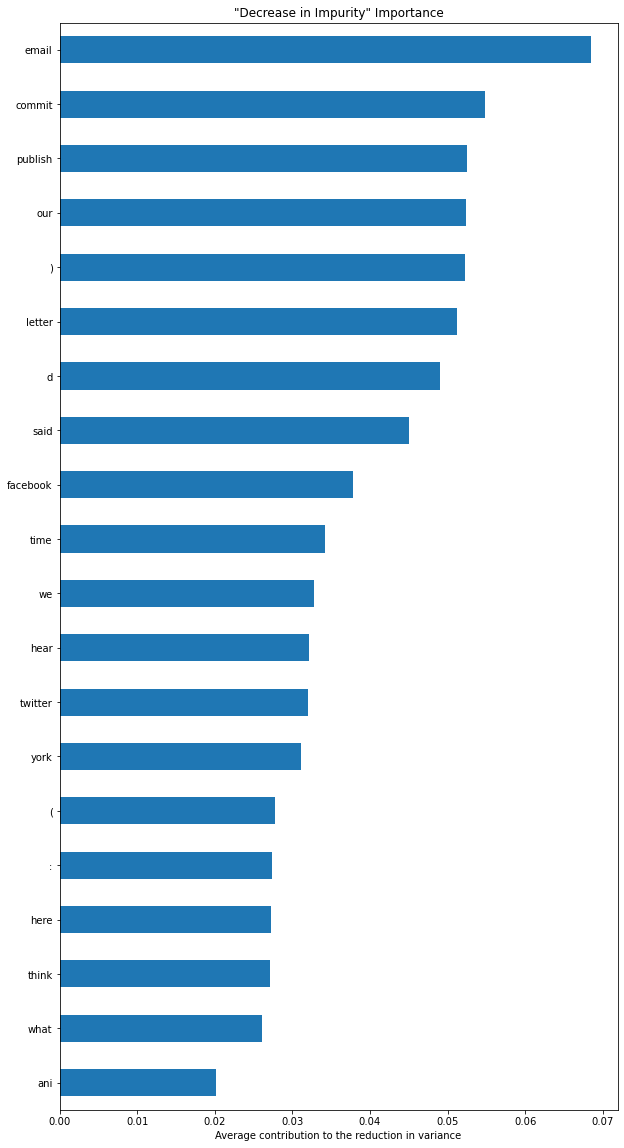

In [120]:
%%time
print(datetime.datetime.now())
feat_scores = pd.Series(feature_import,
                           index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-20:].plot(kind='barh', figsize=(10,20))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance');

In [121]:
%%time
print(datetime.datetime.now())
r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feat_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

2020-12-04 00:38:09.007928


KeyboardInterrupt: 

In [122]:
feat_scores[-60:]

sens         0.001267
mani         0.001284
seem         0.001299
author       0.001310
there        0.001319
fact         0.001346
statement    0.001461
‘            0.001571
rather       0.001606
season       0.001622
comment      0.001623
do           0.001719
tuesday      0.001799
friday       0.002157
me           0.002360
month        0.002612
elect        0.002974
should       0.002979
two          0.003585
ad           0.003685
t            0.004260
if           0.004280
interview    0.004498
?            0.004775
about        0.005079
actual       0.005253
trump        0.005717
ms.          0.005775
all          0.006343
polit        0.006506
some         0.006745
—            0.006815
american     0.007597
america      0.007982
or           0.009995
you          0.010766
mr           0.013420
like         0.015586
follow       0.016222
mr.          0.016847
ani          0.020204
what         0.026053
think        0.027135
here         0.027260
:            0.027314
(         